<a href="https://colab.research.google.com/github/seohyun126/Competition/blob/main/%EC%B2%AD%EB%85%84%EC%9D%98%EC%82%B6%ED%81%B4%EB%9F%AC%EC%8A%A4%ED%84%B0%EB%A7%81_%EC%99%84%EB%A3%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 0 데이터 로드


In [2]:
import pandas as pd
data=pd.read_csv('/content/drive/MyDrive/청년의삶실태조사_전처리_완료.csv')
data.head()

,가구원수,연령,시도코드,국민기초생활보장제도(또는 맞춤형 급여) 수급 여부 및 경험,부모 동거 여부,공공임대주택 거주 경험,현재 거주 지역의 주거 환경 만족도[생활 인프라],현재 거주 지역의 주거 환경 만족도[대중교통 이용],현재 거주 지역의 주거 환경 만족도[치안 및 범죄 등 방범 상태],현재 거주 지역의 주거 환경 만족도[위생 환경],...,개인부채,개인자산,가구소득_5분위,경제활동상태,성별_여,성별_남,혼인상태_미혼,혼인상태_기혼,혼인상태_기타,최근 1달 이상 주택 이외의 거처에 거주한 경험
0,1,1,11,0,0,0,4,4,4,4,...,0,1500,1,1,0,1,1,0,0,0
1,1,1,11,0,0,0,4,5,5,4,...,0,6000,1,1,0,1,1,0,0,0
2,1,1,11,0,0,0,3,4,3,3,...,0,1800,1,1,0,1,1,0,0,0
3,1,1,11,0,0,0,4,4,4,4,...,0,120,1,1,0,1,1,0,0,0
4,1,1,11,0,0,0,4,4,4,4,...,0,550,1,1,0,1,1,0,0,0


In [3]:
# 시도코드의 경우 clustering 완료 후에 확인하기 위해 일단 제외시키기
data_clus=data.drop('시도코드',inplace=False,axis=1)

## 1 수치형 변수 MinMax Scaling

In [4]:
from sklearn.preprocessing import MinMaxScaler
# MinMax Scaling
scaler = MinMaxScaler()

# MinMax Scaling 적용할 열 선택- 수치형 변수
selected_columns = ['가구원수', '연령','현재 거주 지역의 주거 환경 만족도[생활 인프라]',
       '현재 거주 지역의 주거 환경 만족도[대중교통 이용]', '현재 거주 지역의 주거 환경 만족도[치안 및 범죄 등 방범 상태]',
       '현재 거주 지역의 주거 환경 만족도[위생 환경]', '현재 거주 지역의 주거 환경 만족도[녹지 공간]',
       '현재 거주 지역의 주거 환경 만족도[문화/부대시설]', '현재 거주 지역의 주거 환경 만족도[교육 환경]',
       '현재 거주 지역의 주거 환경 만족도[이웃과의 관계]',
       '현재 거주 주택에 대한 만족도[안전하게 보호받는 공간이다]',
       '현재 거주 주택에 대한 만족도[휴식할 수 있는 공간이다]', '현재 거주 주택에 대한 만족도[가족과 함께하는 공간이다]',
       '현재 거주 주택에 대한 만족도[나만의 사적인 공간이다]',
       '현재 거주 주택에 대한 만족도[생리위생 및 세탁, 식사를 위한 공간이다]',
       '현재 거주 주택에 대한 만족도[자산 증식을 위한 수단이다]', '한 달 평균 지출 자기계발비', '(복수일자리)복수일자리 수',
     '외출 빈도', '은둔 생활 상태 지속 기간', '총생활비', '총소득(개인)', '개인부채', '개인자산',
       '가구소득_5분위']

# 선택된 열에 대해 MinMax Scaling 수행
data_clus[selected_columns] = scaler.fit_transform(data_clus[selected_columns])
data_clus.describe()

,가구원수,연령,국민기초생활보장제도(또는 맞춤형 급여) 수급 여부 및 경험,부모 동거 여부,공공임대주택 거주 경험,현재 거주 지역의 주거 환경 만족도[생활 인프라],현재 거주 지역의 주거 환경 만족도[대중교통 이용],현재 거주 지역의 주거 환경 만족도[치안 및 범죄 등 방범 상태],현재 거주 지역의 주거 환경 만족도[위생 환경],현재 거주 지역의 주거 환경 만족도[녹지 공간],...,개인부채,개인자산,가구소득_5분위,경제활동상태,성별_여,성별_남,혼인상태_미혼,혼인상태_기혼,혼인상태_기타,최근 1달 이상 주택 이외의 거처에 거주한 경험
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,...,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,0.274380,0.341436,0.038935,0.528445,0.084527,0.700373,0.689202,0.713032,0.690993,0.704862,...,0.009236,0.012832,0.476170,0.646359,0.517047,0.482953,0.924955,0.066371,0.008675,0.017248
std,0.257261,0.381827,0.193449,0.499215,0.278190,0.248943,0.265290,0.229628,0.242819,0.256176,...,0.035862,0.035515,0.359644,0.478124,0.499735,0.499735,0.263478,0.248942,0.092737,0.130202
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.000000,0.000567,0.250000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,0.200000,0.000000,0.000000,1.000000,0.000000,0.750000,0.750000,0.750000,0.750000,0.750000,...,0.000000,0.003310,0.500000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,0.400000,0.500000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.011147,0.750000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 2 PCA+KMeans Clustering 진행
- KMeans 군집 개별 실루엣 계수 확인


🔎 실루엣 계수란? 군집화의 품질을 측정하는 지표 중 하나로 군집화가 얼마나 잘 이루어졌는지, 각 데이터 포인트가 같은 군집 내의 다른 데이터 포인트와 얼마나 비슷하고, 다른 군집과 얼마나 다른지를 측정함
  
🖋️ 실루엣 계수는 -1에서 1 사이의 값을 가지며, 높을수록 군집화의 품질이 좋다고 판단됨.

🖋️ 각 데이터 포인트에 대한 실루엣 계수는 다음과 같이 계산됨

> a(i): 같은 군집 내의 모든 다른 데이터 포인트와의 평균 거리

> b(i): 다른 군집에서 해당 데이터 포인트까지의 평균 거리 (가장 가까운 다른 군집 선택)

> s(i): (b(i) - a(i)) / max(b(i), a(i))

🖋️ 전체 데이터셋에 대한 실루엣 계수는 모든 데이터 포인트의 실루엣 계수의 평균

🖋️ s(i)가 1에 가까울 때: 데이터 포인트가 잘 군집화되어 있음을 나타냄

🖋️s(i)가 0에 가까울 때: 데이터 포인트가 군집 경계에 위치할 가능성이 높음

🖋️ s(i)가 -1에 가까울 때: 데이터 포인트가 잘못된 군집에 속해 있을 가능성이 높음

- PCA로 2차원 축소, 그리고 KMeans 군집 계수가 2-19개까지 실루엣 계수 확인

In [7]:
import warnings
# KMeans 모델 생성 시에 나타나는 경고 숨기기
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn.cluster")

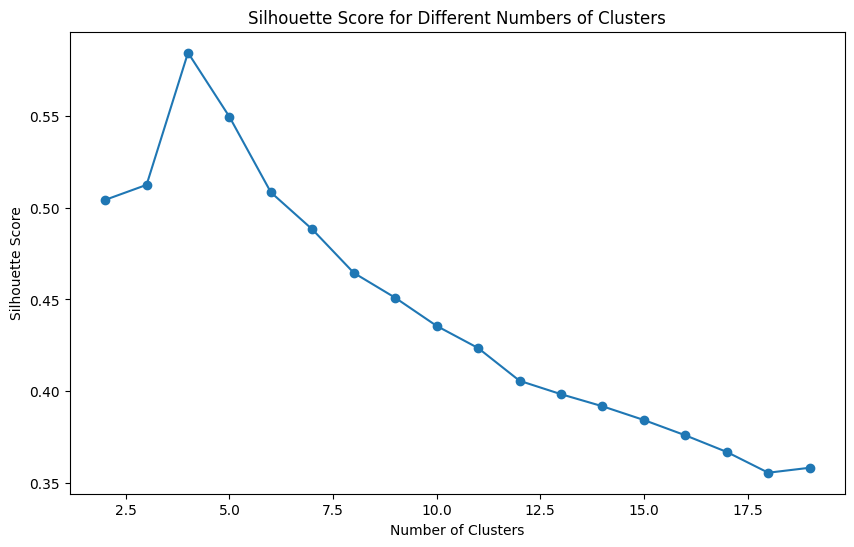

    n_clusters  silhouette_score
0            2          0.504238
1            3          0.512424
2            4          0.584413
3            5          0.549471
4            6          0.508334
5            7          0.488163
6            8          0.464476
7            9          0.450920
8           10          0.435574
9           11          0.423527
10          12          0.405692
11          13          0.398390
12          14          0.391814
13          15          0.384318
14          16          0.375982
15          17          0.366918
16          18          0.355608
17          19          0.358311


In [8]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_clus)

# KMeans 클러스터링 결과 저장할 리스트
cluster_results = []

# 클러스터링을 2부터 19까지 수행하고 결과 저장
for n_clusters in range(2, 20):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans_labels = kmeans.fit_predict(X_pca)
    silhouette_avg = silhouette_score(X_pca, kmeans_labels)
    cluster_results.append({'n_clusters': n_clusters, 'silhouette_score': silhouette_avg})

# 결과를 데이터프레임으로 변환
result_df = pd.DataFrame(cluster_results)

# 실루엣 스코어 그래프로 시각화
plt.figure(figsize=(10, 6))
plt.plot(result_df['n_clusters'], result_df['silhouette_score'], marker='o')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

# 결과 표로 출력
print(result_df)

Kmeans 군집화 개수가 4개일 때 실루엣 스코어가 가장 높은 것을 확인

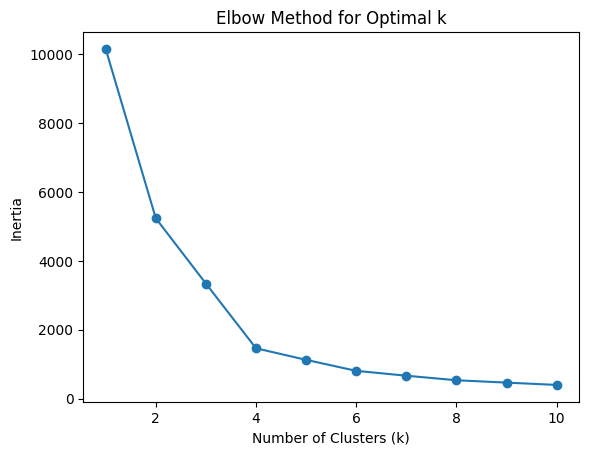

In [9]:
# Inertia 값을 저장할 리스트
inertia_values = []

# KMeans 모델을 1에서 10까지의 k값에 대해 학습하고 inertia를 계산하여 리스트에 저장
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    inertia_values.append(kmeans.inertia_)

# Elbow Method를 통한 군집 개수 결정을 위한 그래프 그리기
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

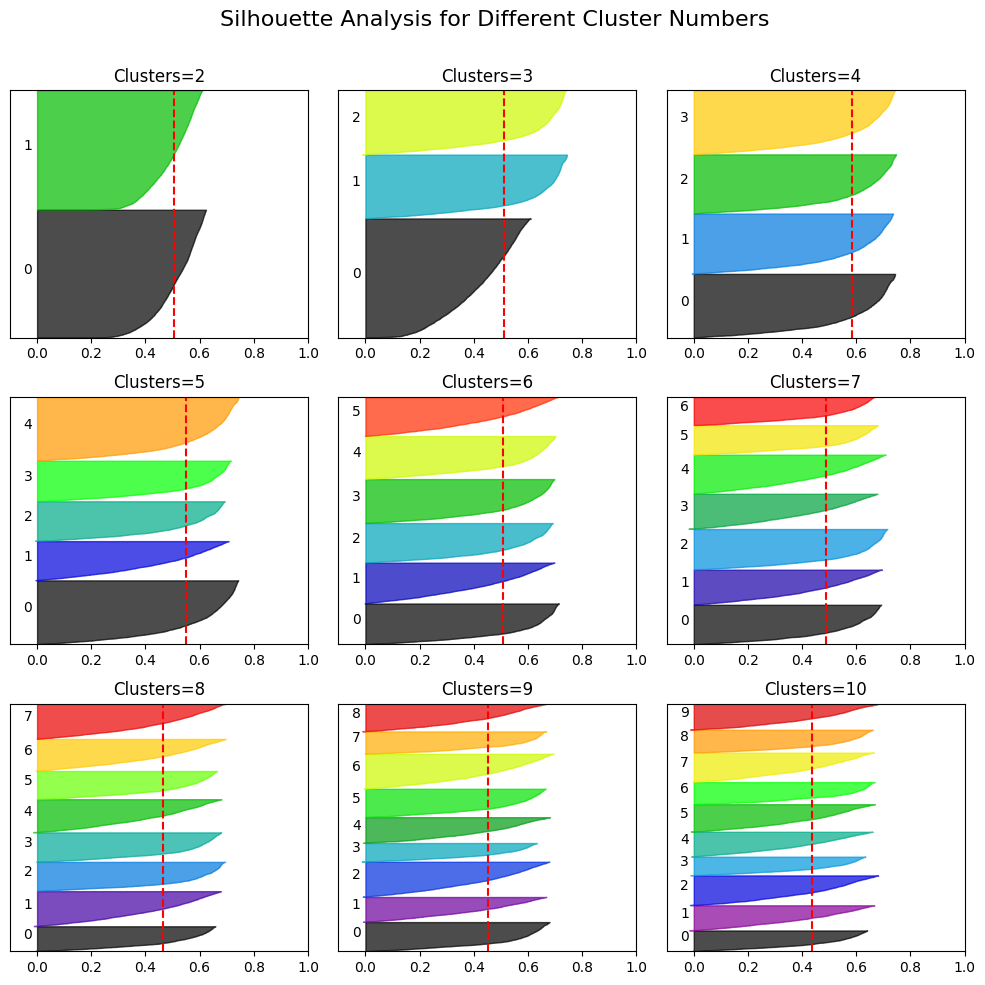

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples


# 클러스터 개수 범위 설정
cluster_range = range(2, 11)

# 시각화를 위한 subplot 생성
fig, ax = plt.subplots(3, 3, figsize=(10, 10))
fig.suptitle('Silhouette Analysis for Different Cluster Numbers', fontsize=16)

for n_clusters, subplot in zip(cluster_range, ax.flatten()):
    # KMeans 모델 학습
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_pca)

    # 실루엣 스코어 계산
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    # 각 클러스터의 실루엣 스코어 플로팅
    y_lower = 10
    for i in range(n_clusters):
        # 클러스터 내의 각 데이터에 대한 실루엣 스코어 정렬
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        subplot.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

        # 각 클러스터 라벨링
        subplot.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 다음 플로팅을 위해 간격 조절

    # 전체 실루엣 스코어 플로팅
    subplot.set_title(f'Clusters={n_clusters}', fontsize=12)
    subplot.set_xlim([-0.1, 1])
    subplot.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])
    subplot.axvline(x=silhouette_avg, color="red", linestyle="--")  # 평균 실루엣 스코어 선 추가
    subplot.set_yticks([])  # y 축 제거

# 전체 플롯의 레이아웃 조절
plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

## 3 PCA 2차원, KMeans 4개로 클러스터링

클러스터링 시각화

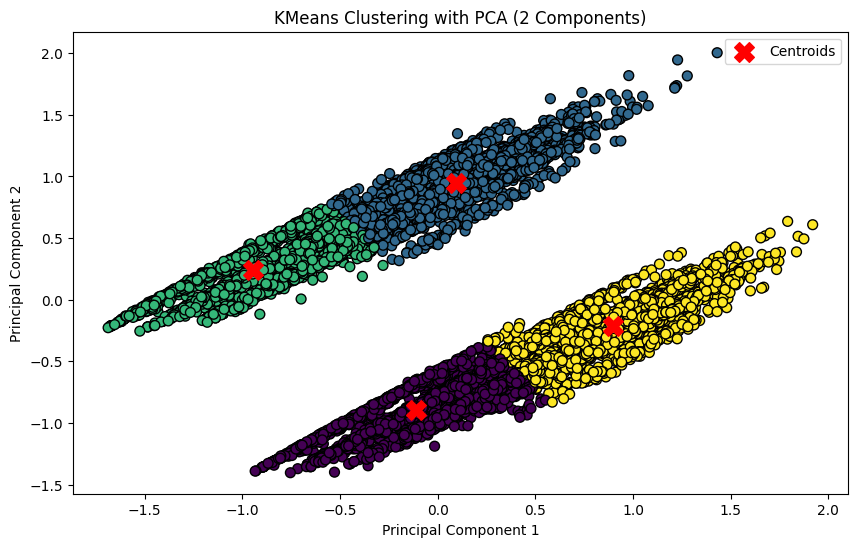

In [12]:
# PCA를 사용하여 2차원으로 차원 축소
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data_clus)

# KMeans 클러스터링 (4개의 클러스터)
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

# 시각화
plt.figure(figsize=(10, 6))

# 데이터 포인트를 클러스터별로 색깔로 표시
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', edgecolors='k', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='X', s=200, label='Centroids')

plt.title('KMeans Clustering with PCA (2 Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [15]:
data.head()

,가구원수,연령,시도코드,국민기초생활보장제도(또는 맞춤형 급여) 수급 여부 및 경험,부모 동거 여부,공공임대주택 거주 경험,현재 거주 지역의 주거 환경 만족도[생활 인프라],현재 거주 지역의 주거 환경 만족도[대중교통 이용],현재 거주 지역의 주거 환경 만족도[치안 및 범죄 등 방범 상태],현재 거주 지역의 주거 환경 만족도[위생 환경],...,개인부채,개인자산,가구소득_5분위,경제활동상태,성별_여,성별_남,혼인상태_미혼,혼인상태_기혼,혼인상태_기타,최근 1달 이상 주택 이외의 거처에 거주한 경험
0,1,1,11,0,0,0,4,4,4,4,...,0,1500,1,1,0,1,1,0,0,0
1,1,1,11,0,0,0,4,5,5,4,...,0,6000,1,1,0,1,1,0,0,0
2,1,1,11,0,0,0,3,4,3,3,...,0,1800,1,1,0,1,1,0,0,0
3,1,1,11,0,0,0,4,4,4,4,...,0,120,1,1,0,1,1,0,0,0
4,1,1,11,0,0,0,4,4,4,4,...,0,550,1,1,0,1,1,0,0,0


In [16]:
# 클러스터 레이블을 data_clus에 추가
data['KMeans_Labels'] = kmeans_labels

In [19]:
data_clus['KMeans_Labels'] = kmeans_labels

- 각 군집별 특징 확인

In [17]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
data.groupby('KMeans_Labels').mean()

,가구원수,연령,시도코드,국민기초생활보장제도(또는 맞춤형 급여) 수급 여부 및 경험,부모 동거 여부,공공임대주택 거주 경험,현재 거주 지역의 주거 환경 만족도[생활 인프라],현재 거주 지역의 주거 환경 만족도[대중교통 이용],현재 거주 지역의 주거 환경 만족도[치안 및 범죄 등 방범 상태],현재 거주 지역의 주거 환경 만족도[위생 환경],현재 거주 지역의 주거 환경 만족도[녹지 공간],현재 거주 지역의 주거 환경 만족도[문화/부대시설],현재 거주 지역의 주거 환경 만족도[교육 환경],현재 거주 지역의 주거 환경 만족도[이웃과의 관계],공공임대주택 거주 의향,최근 1년간 주거불안 상황 경험[2개월 이상 월 임대료 연체],최근 1년간 주거불안 상황 경험[이사 또는 임대차 계약 갱신에 필요한 임대 보증금 부족],최근 1년간 주거불안 상황 경험[임대인이 기피하는 대상자라는 이유로 주택확보 곤란],최근 1년간 주거불안 상황 경험[3개월 이상 주택담보대출 이자 또는 원리금 상환 연체],"최근 1년간 주거불안 상황 경험[주택압류, 재개발, 임대차 계약 중도 해지 등으로 인한 퇴거]",최근 1년간 주거불안 상황 경험[3개월 이상 공과금이나 관리비 연체],최근 1년간 주거불안 상황 경험[임대인과의 갈등],최근 1년간 주거불안 상황 경험[주택임대차 보호법 위반],현재 거주 주택에 대한 만족도[안전하게 보호받는 공간이다],현재 거주 주택에 대한 만족도[휴식할 수 있는 공간이다],현재 거주 주택에 대한 만족도[가족과 함께하는 공간이다],현재 거주 주택에 대한 만족도[나만의 사적인 공간이다],"현재 거주 주택에 대한 만족도[생리위생 및 세탁, 식사를 위한 공간이다]",현재 거주 주택에 대한 만족도[자산 증식을 위한 수단이다],한 달 평균 지출 자기계발비,(복수일자리)복수일자리 수,취업 경험,외출 빈도,은둔 생활 상태 지속 기간,총생활비,총소득(개인),개인부채,개인자산,가구소득_5분위,경제활동상태,성별_여,성별_남,혼인상태_미혼,혼인상태_기혼,혼인상태_기타,최근 1달 이상 주택 이외의 거처에 거주한 경험
KMeans_Labels,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,3.341158,1.449922,27.998044,0.036776,0.920188,0.053991,4.043036,3.948357,4.122457,4.076291,4.153365,3.749218,3.915493,3.788341,0.986307,0.004695,0.018388,0.003521,0.003521,0.001956,0.006651,0.011346,0.008607,4.568858,4.597809,4.619327,4.074726,4.463615,3.555947,10.549687,0.612285,0.385368,7.242958,0.056729,716.441315,1402.438967,181.499609,1424.384194,3.792254,0.585681,1.0,0.0,0.961268,0.034820,0.003912,0.005869
1,1.404801,1.897765,27.134934,0.035182,0.146109,0.111341,3.501242,3.506209,3.564156,3.426738,3.445778,3.182533,3.266142,3.199917,0.977649,0.049669,0.087334,0.012831,0.012003,0.009934,0.028146,0.039321,0.020695,3.923841,4.051325,3.069536,3.901490,3.784768,2.585265,9.697848,0.767798,0.461921,7.548013,0.046358,513.588990,2506.080298,1264.646937,4041.509520,2.019454,0.739238,0.0,1.0,0.915149,0.075331,0.009520,0.031871
2,3.219224,1.470489,27.910624,0.028668,0.943929,0.045531,4.045110,3.974705,4.204890,4.111298,4.161467,3.819562,3.936341,3.807757,0.990725,0.009696,0.016863,0.004216,0.003794,0.004216,0.007589,0.010540,0.005902,4.552277,4.579680,4.591062,4.075885,4.415261,3.627740,11.649241,0.500000,0.326307,7.195616,0.076728,535.059865,1257.136172,209.077993,1506.494519,3.760118,0.485245,0.0,1.0,0.990304,0.007167,0.002530,0.015177
3,1.535019,1.908560,27.108949,0.054086,0.114786,0.125681,3.618677,3.600778,3.528405,3.449805,3.522957,3.235019,3.315564,3.207782,0.977043,0.031907,0.110117,0.016342,0.010117,0.007393,0.027237,0.049027,0.015175,3.940078,4.129572,3.151751,3.971595,3.928405,2.524514,9.486770,0.808171,0.542802,7.403113,0.064981,305.635798,2242.024514,931.636576,3862.878988,2.064591,0.768093,1.0,0.0,0.837743,0.143969,0.018288,0.016732


In [32]:
data.groupby('KMeans_Labels')['시도코드'].value_counts()

KMeans_Labels  시도코드
0              31      429
               11      287
               23      195
               22      167
               32      154
               35      148
               38      145
               36      141
               21      138
               37      136
               34      109
               24      107
               25      107
               33       87
               26       80
               39       77
               29       49
1              11      356
               31      275
               38      158
               23      157
               21      154
               37      146
               34      134
               24      129
               25      129
               22      126
               35      121
               32      117
               29       96
               33       95
               26       88
               36       78
               39       57
2              31      408
               11      263
        

## 4 데이터 내보내기

In [33]:
data_clus.to_csv('/content/drive/MyDrive/청년의삶실태조사_클러스터링_완료.csv')